In [1]:
import ROOT
import numpy as np
import copy

Welcome to JupyROOT 6.24/07


In [2]:
# configure ROOT's behavior
ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat("nemruoi")
ROOT.gStyle.SetPadTickX(1) # to get the tick marks on the opposite side of the frame
ROOT.gStyle.SetPadTickY(1) # to get the tick marks on the opposite side of the frame
ROOT.gROOT.ForceStyle()

In [3]:
# data file
JetHTFile = ROOT.TFile.Open("/users/ferencek/HHH/condor_jobs_CutFlow_20230907_231013/fit/JetHT2017_Histograms.root" ,"READ")

In [4]:
# see what is inside the file
JetHTFile.ls()

TFile**		/users/ferencek/HHH/condor_jobs_CutFlow_20230907_231013/fit/JetHT2017_Histograms.root	
 TFile*		/users/ferencek/HHH/condor_jobs_CutFlow_20230907_231013/fit/JetHT2017_Histograms.root	
  KEY: TH1D	j3_SR_pass_boosted;1	
  KEY: TH1D	j3_VR_pass_boosted;1	
  KEY: TH2D	mjj_vs_mjjj_SR_pass_boosted;1	
  KEY: TH2D	mjj_vs_mjjj_VR_pass_boosted;1	
  KEY: TH1D	j3_SR_fail_boosted;1	
  KEY: TH1D	j3_VR_fail_boosted;1	
  KEY: TH2D	mjj_vs_mjjj_SR_fail_boosted;1	
  KEY: TH2D	mjj_vs_mjjj_VR_fail_boosted;1	
  KEY: TH1D	j3_SR_pass_semiboosted;1	
  KEY: TH1D	j3_VR_pass_semiboosted;1	
  KEY: TH2D	mjj_vs_mjjj_SR_pass_semiboosted;1	
  KEY: TH2D	mjj_vs_mjjj_VR_pass_semiboosted;1	
  KEY: TH1D	j3_SR_fail_semiboosted;1	
  KEY: TH1D	j3_VR_fail_semiboosted;1	
  KEY: TH2D	mjj_vs_mjjj_SR_fail_semiboosted;1	
  KEY: TH2D	mjj_vs_mjjj_VR_fail_semiboosted;1	
  KEY: TH1F	cutFlowHisto_SR_boosted;1	SR_boosted
  KEY: TH1F	cutFlowHisto_VR_boosted;1	VR_boosted
  KEY: TH1F	cutFlowHisto_SR_semiboosted;1	SR_semiboosted
  KEY

In [5]:
# trijet mass histogram for the boosted validation region, fail category
data_j3_VR_fail_boosted = JetHTFile.Get("j3_VR_fail_boosted")

# trijet mass histogram for the boosted validation region, pass category
data_j3_VR_pass_boosted = JetHTFile.Get("j3_VR_pass_boosted")

In [6]:
# create canvas
c1=ROOT.TCanvas("c1","The Canvas Title",1000,1000)

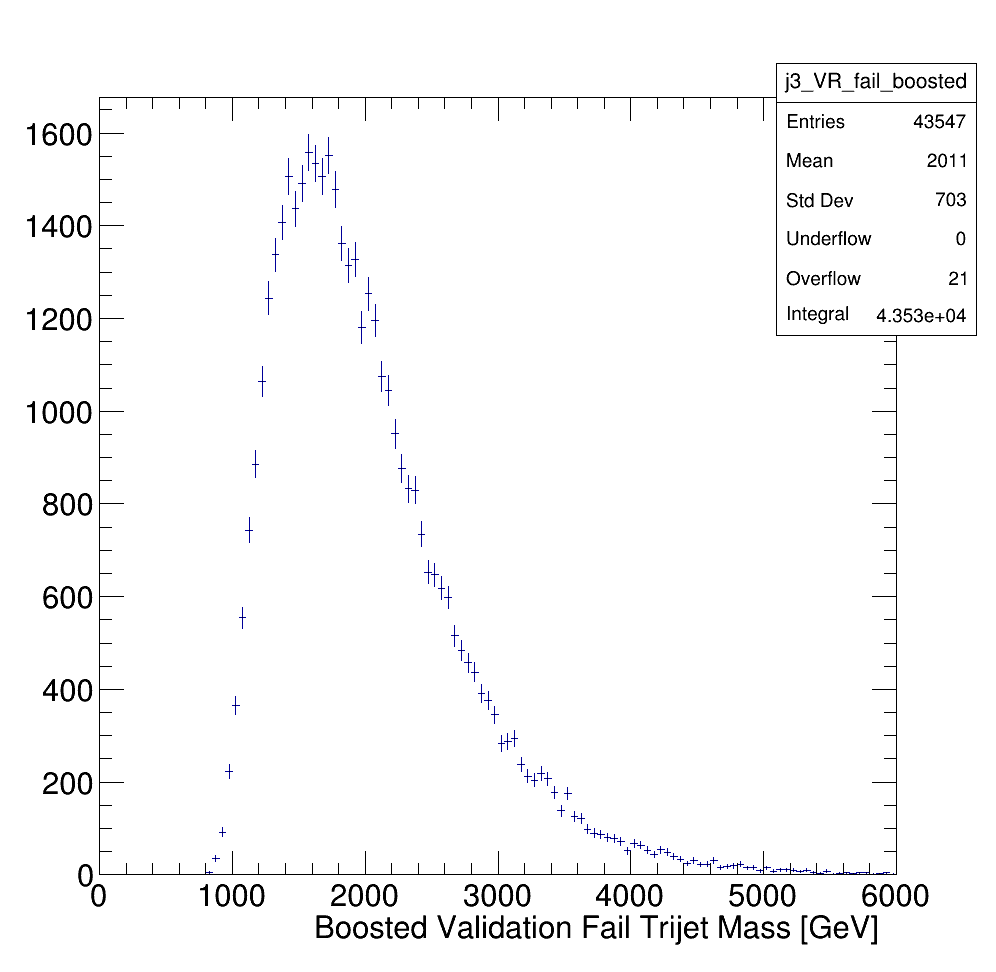

In [7]:
# draw the fail histogram
data_j3_VR_fail_boosted.Draw()
c1.Draw()

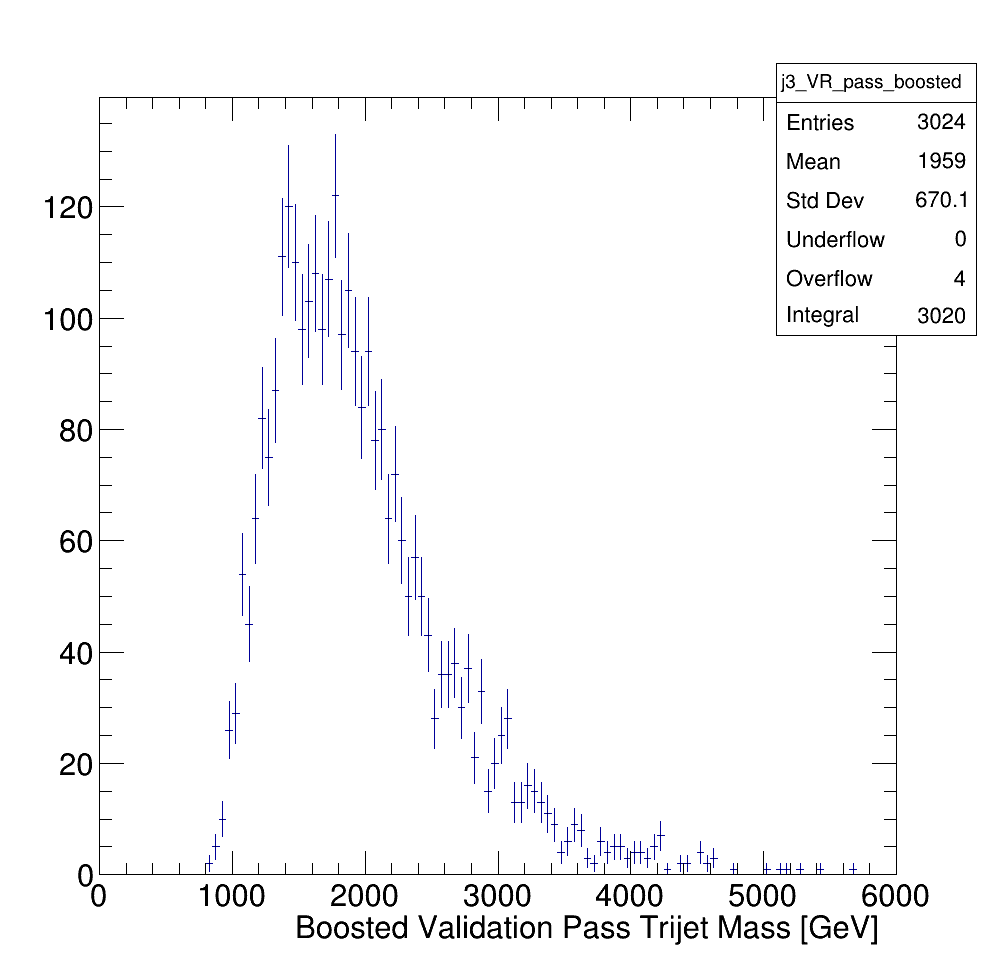

In [8]:
# draw the pass histogram
data_j3_VR_pass_boosted.Draw()
c1.Draw()

In [9]:
# rebin histograms

# bin ranges
pTbins_j3 = np.array([800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2200.0, 2500.0, 3000.0, 4000.0])
pTbins_j2 = np.array([300.0, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000.0])

data_j3_VR_fail_boosted_vr = copy.deepcopy(data_j3_VR_fail_boosted.Rebin(len(pTbins_j3)-1, "j3_VR_fail_boosted_vr", pTbins_j3))
data_j3_VR_pass_boosted_vr = copy.deepcopy(data_j3_VR_pass_boosted.Rebin(len(pTbins_j3)-1, "j3_VR_pass_boosted_vr", pTbins_j3))

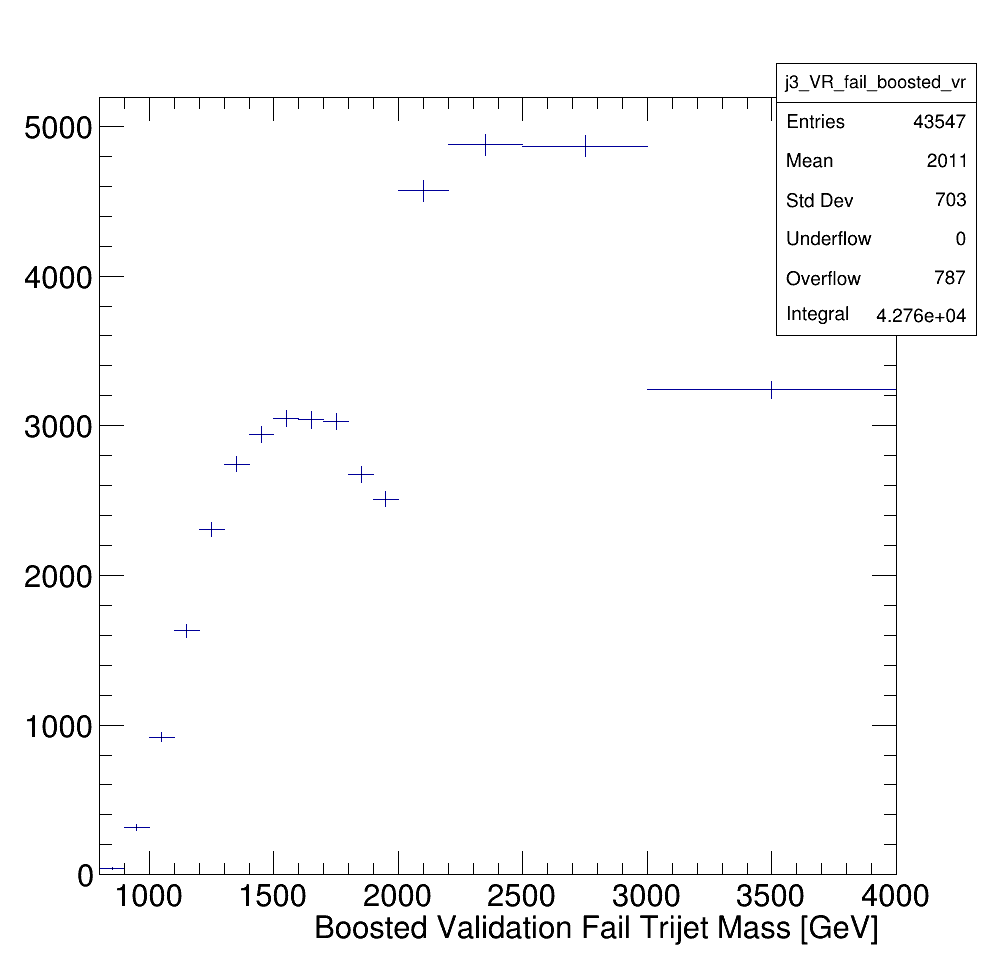

In [10]:
# draw the rebinned fail histogram
data_j3_VR_fail_boosted_vr.Draw()
c1.Draw()

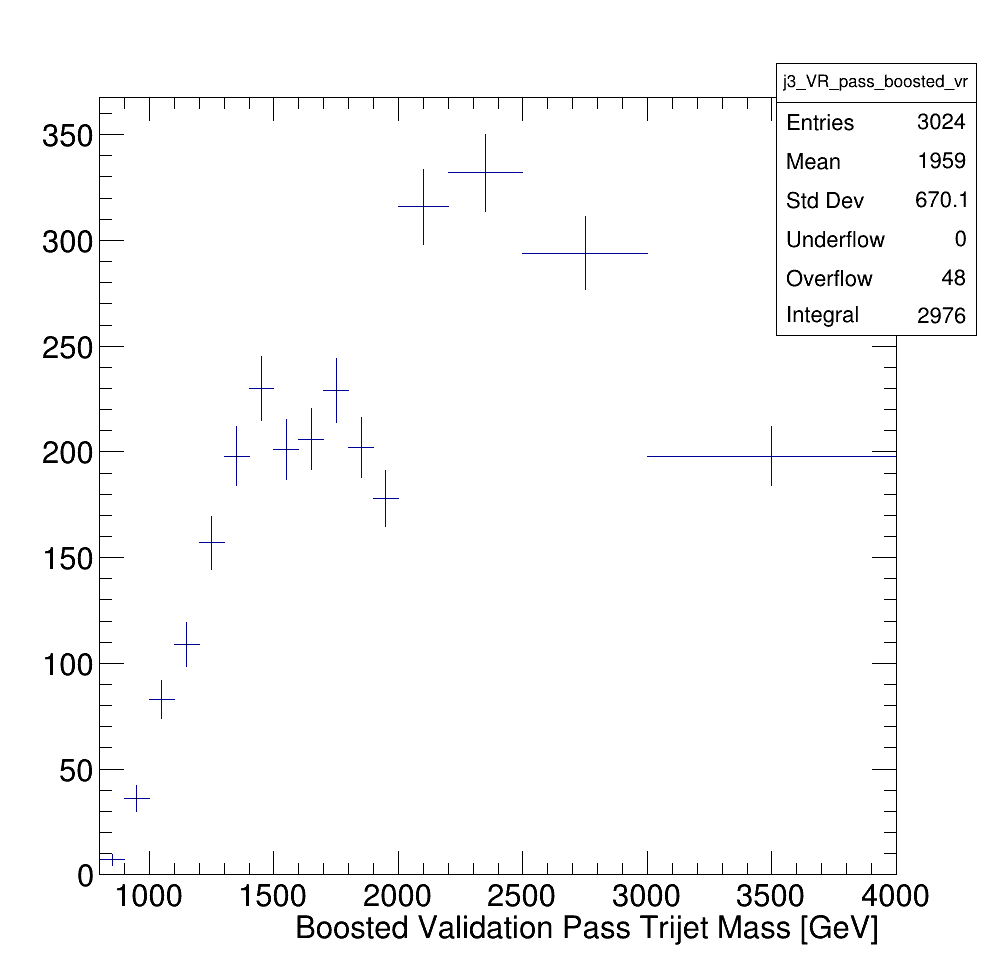

In [11]:
# draw the rebinned pass histogram
data_j3_VR_pass_boosted_vr.Draw()
c1.Draw()

In [12]:
# scale histogram bins by the bin width

# print integrals before rescaling
print(data_j3_VR_fail_boosted_vr.Integral())
print(data_j3_VR_pass_boosted_vr.Integral())

data_j3_VR_fail_boosted_vr.Scale(1., 'width')
data_j3_VR_pass_boosted_vr.Scale(1., 'width')

# print integrals after rescaling
print(data_j3_VR_fail_boosted_vr.Integral())
print(data_j3_VR_fail_boosted_vr.Integral('width'))
print(data_j3_VR_pass_boosted_vr.Integral())
print(data_j3_VR_pass_boosted_vr.Integral('width'))

42760.0
2976.0
304.113
42760.0
21.832666666666665
2976.0


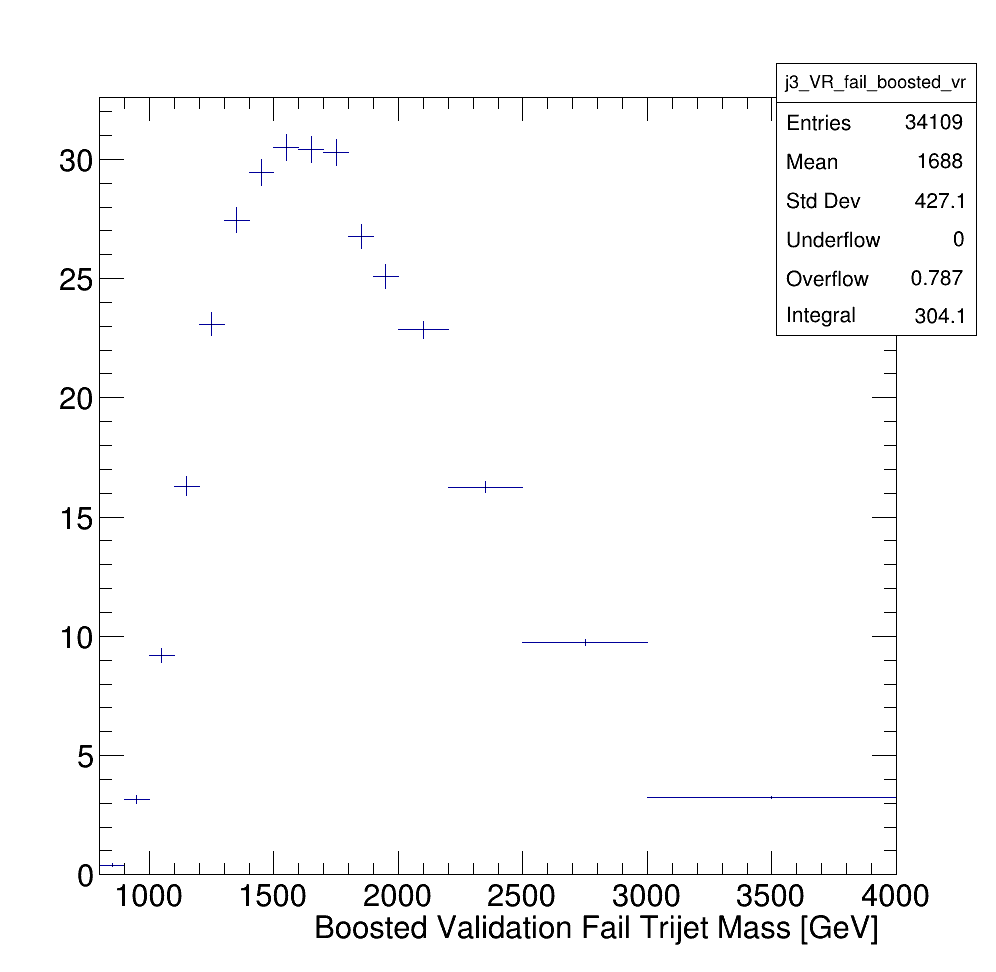

In [13]:
# draw the rescaled fail histogram
data_j3_VR_fail_boosted_vr.Draw()
c1.Draw()

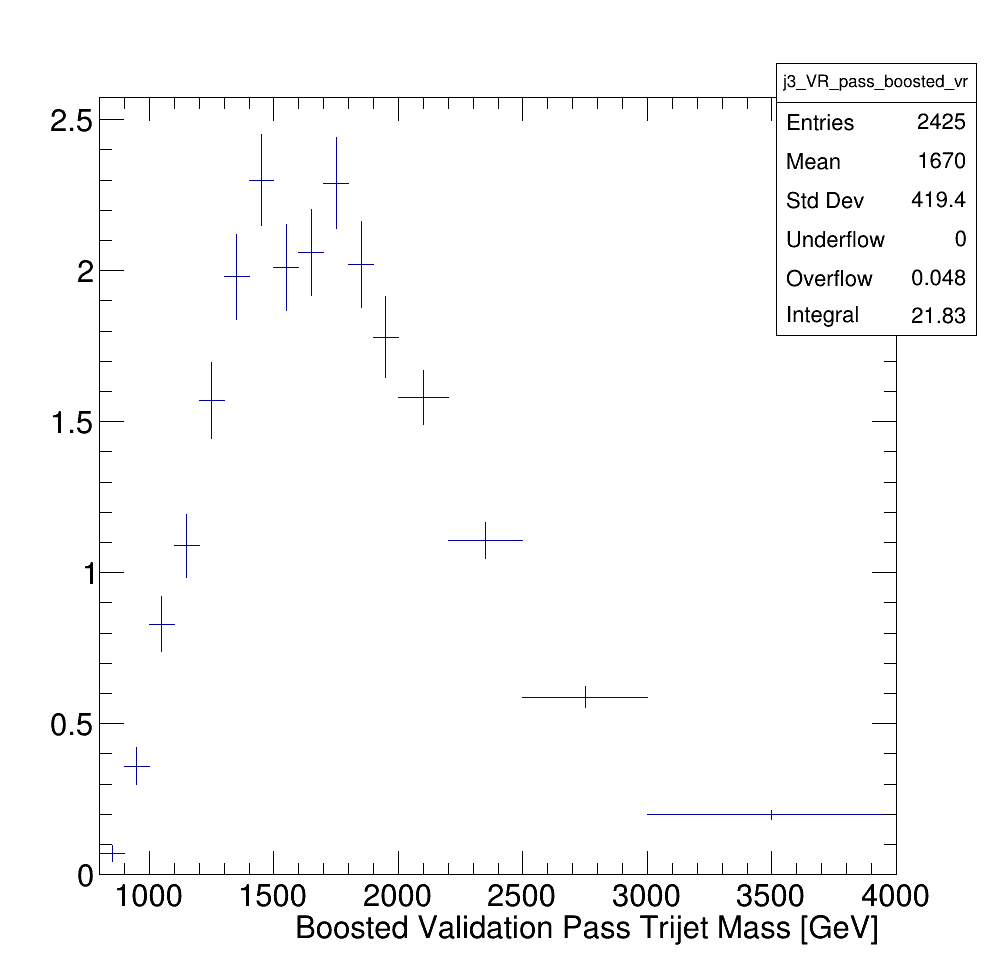

In [14]:
# draw the rescaled pass histogram
data_j3_VR_pass_boosted_vr.Draw()
c1.Draw()